# BeerMart Case Study 

## Problem Statement:-
You are the sales manager for "BeerMart", an online beer store in the United States. You want to build a recommendation system (collaborative) for your store, where customers will be recommended the beer that they are most likely to buy. You collect data about the ratings that the customers have given in the past

### Steps Involved:
​
1. Data Inspection
2. Data Preparation
3. Data Exploration
4. Recommandation Models: User based and Item based
5. Comparison & Recommandation

In [34]:
# import libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

#For Visualisation 

import matplotlib.pyplot as plt
import seaborn as sns

# Using  Jupyter Notebook

beer_data=pd.read_csv("C:/Users/nidhi/Downloads/beer_data.csv", encoding='latin-1')
beer_data.head()


#using Google colab

#from google.colab import files
#uploaded = files.upload()
#import io
#beer_data = pd.read_csv(io.BytesIO(uploaded['beer_data.csv']))
#beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


#### Step:1 Inspecting Dataset


In [35]:
#About Dataset

beer_data.info()
beer_data.columns
beer_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


(475984, 3)

In [56]:
beer_data.describe(percentiles=[.5,.75,.9,.95])

,beer_beerid,review_overall
count,296781.000000,296781.000000
mean,15391.488219,3.881937
std,18791.528318,0.699173
min,5.000000,1.000000
50%,3951.000000,4.000000
75%,28577.000000,4.500000
90%,46385.000000,4.500000
95%,53453.000000,5.000000
max,75086.000000,5.000000


In [37]:
# Checking Null values
#Percentage of Null values columnwise

(beer_data.isnull().sum()*100/beer_data.shape[0]).round(2)


beer_beerid           0.00
review_profilename    0.02
review_overall        0.00
dtype: float64

In [38]:
# Checking for Duplicate value

# number of dublicate rows as 0

sum(beer_data.duplicated(subset = "beer_beerid")) == 0

False

In [39]:
# Checking for Duplicate value

beer_data[beer_data.duplicated(keep=False)]

,beer_beerid,review_profilename,review_overall
2300,73647,barleywinefiend,4.5
2301,73647,barleywinefiend,4.5
2348,14243,northyorksammy,2.5
2349,14243,northyorksammy,2.5
2607,1122,Slatetank,4.0
2608,1122,Slatetank,4.0
3262,962,RedDiamond,3.5
3295,962,RedDiamond,3.5
3331,961,Offa,4.0
3338,961,Offa,4.0


#### There are Duplicates !!! Need to be dropped !!!

In [40]:
# Dropping  dublicate values 

beer_data.drop_duplicates(keep='first', inplace=True)

In [43]:
beer_data.shape

(475404, 3)

#### Checking the Unique values of beerid, review_profilename and review_overall

In [44]:
beer_data['review_profilename'].unique()

array(['stcules', 'oline73', 'alpinebryant', ..., 'brandnew711',
       'NyackNicky', 'PopeDX'], dtype=object)

In [45]:
#Total no. of distinct  beers

beer_data.review_profilename.nunique()

22497

In [46]:
#Total no. of unique reviews

beer_data.review_overall.nunique()

10

#### Checking the value_counts of  beerids, review_profilename and review_overall 

In [47]:
#Finding out the list of Top 10 beers

beer_data['beer_beerid'].value_counts()[:10]

2093    980
412     973
1904    904
1093    845
92      817
4083    804
276     792
7971    785
88      758
1013    755
Name: beer_beerid, dtype: int64

In [48]:
# Count of review_profilename

beer_data.review_profilename.value_counts()

northyorksammy      1844
mikesgroove         1377
BuckeyeNation       1337
Thorpe429           1072
ChainGangGuy        1046
NeroFiddled         1027
womencantsail       1013
brentk56             998
WesWes               977
Phyl21ca             973
feloniousmonk        966
oberon               929
akorsak              893
BEERchitect          888
Gueuzedude           872
jwc215               826
TheManiacalOne       808
russpowell           806
Gavage               787
tempest              786
Halcyondays          763
Viggo                762
Mora2000             761
zeff80               757
Wasatch              748
drabmuh              745
weeare138            740
wl0307               728
WVbeergeek           726
barleywinefiend      721
                    ... 
doc10house             1
DeltaFoxtrot           1
sloucho                1
thaxomatic             1
Landser116             1
EAlex                  1
meganlibrarian         1
flood                  1
badworthing            1


In [49]:
# Count of beer review_overall 

beer_data.review_overall.value_counts()

4.0    174548
4.5     97178
3.5     90744
3.0     49500
5.0     27119
2.5     17595
2.0     11610
1.5      3815
1.0      3289
0.0         6
Name: review_overall, dtype: int64

In [50]:
beer_data.groupby(['review_profilename','review_overall']).count()

beer_beerid
review_profilename review_overall             
0110x011           3.0                       4
                   3.5                       1
                   4.0                      10
                   4.5                      11
                   5.0                       9
01Ryan10           5.0                       1
03SVTCobra         1.0                       1
04101Brewer        4.0                       1
05Harley           2.5                       1
                   3.0                       2
                   4.0                      21
                   4.5                      14
                   5.0                       3
0beerguy0          3.0                       1
                   4.5                       1
                   5.0                       1
0runkp0s           3.5                       1
0tt0               1.5                       1
                   3.0                       2
                   4.0                       4
                   4.5                       6
                   5.0                       1
1000Bottles        2.0                       1
                   2.5                       1
                   3.5                       1
                   4.0                       1
                   4.5                       3
                   5.0                       1
1001111            3.5                       1
                   4.5                       1
...                                        ...
zuggy9             1.5                       1
                   2.0                       2
                   3.0                       2
                   3.5                       3
                   4.0                       7
                   4.5                       5
                   5.0                       1
zuker              3.5                       1
zulufactor         2.0                       1
                   3.5                       1
zumicroom          4.5                       1
zwalk8             4.5                       1
zwan               3.5                       1
                   4.0                       3
                   4.5                       1
zymrgy             3.0                       1
                   3.5                       1
zymurgy4all        2.5                       1
                   3.0                       7
                   3.5                      10
                   4.0                      10
                   4.5                       5
                   5.0                       2
zymurgywhiz        4.0                       1
                   4.5                       1
zythus             2.5                       1
                   5.0                       2
zyzygy             4.0                       2
                   4.5                       1
zzajjber           5.0                       1

[67244 rows x 1 columns]

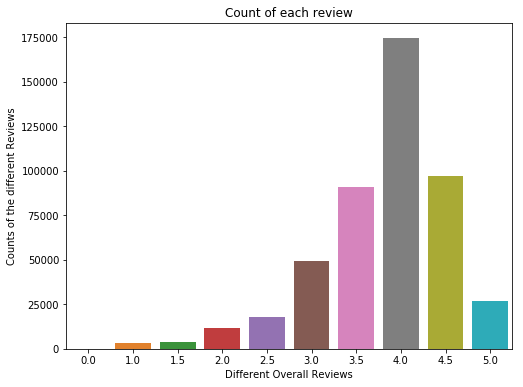

In [51]:
#Lets see the counts of these reviews count visually 

reviews = pd.DataFrame(beer_data['review_overall'].value_counts()).reset_index()

plt.figure(figsize=(8,6))
plt.title("Count of each review")

sns.barplot(y=reviews.review_overall,x=reviews['index'])

plt.xlabel("Different Overall Reviews")
plt.ylabel("Counts of the different Reviews")

plt.show()

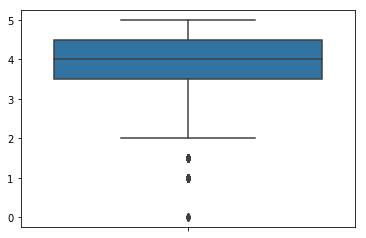

In [52]:
sns.boxplot(y=['review_overall'],data =beer_data)

In [53]:
#Lets describe the count of reviews

pd.DataFrame(beer_data.groupby("beer_beerid").count()['review_overall']).describe(percentiles = [0.90,0.95])

,review_overall
count,40308.000000
mean,11.794284
std,42.016759
min,1.000000
50%,2.000000
90%,21.000000
95%,51.000000
max,980.000000


In [54]:
beer_data = beer_data.groupby('beer_beerid').filter(lambda x: len(x) >= 50)
beer_data

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0
105,10784,Jayli,4.0
106,10784,clayrock81,4.0
107,10784,beerphan,4.0
108,10784,OWSLEY069,3.0
109,10784,AEK,4.0


### Split  dataset into train and test

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(beerdata, test_size=0.30, random_state=30)

In [19]:
print(train.shape)
print(test.shape)

(208142, 3)
(89204, 3)


In [20]:
#drop dublicates from train
train.drop_duplicates(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# pivot ratings into beer features
beerdata_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
    #aggfunc='mean'
).fillna(0)

In [22]:
beerdata_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
beerdata_features.shape

(17123, 2069)

In [0]:
#Copy train and test data set for future use of prediction and evalution 
train_dummy = train.copy()
test_dummy = test.copy()

In [0]:
train_dummy['review_overall'] = train_dummy['review_overall'].apply(lambda x: 0 if x>=1 else 0)
test_dummy['review_overall'] = test_dummy['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [0]:
# The beer not rated by user is marked as 1 for prediction. 
train_dummy = train_dummy.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)


In [0]:
# The beer not rated by user is marked as 0 for evaluation. 
test_dummy = test_dummy.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [28]:
train_dummy.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0runkp0s,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
test_dummy.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Recommendation Algorithm

## User Similarity Matrix

### 1-Using Cosine Similarity

In [30]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(beerdata_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.05151555 ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.05151555 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [31]:
user_correlation.shape

(17123, 17123)

### Using Adjusted Cosine

In [0]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [33]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#normalise user rating  of beer for each use  with 0 mean
mean = np.nanmean(beer_features, axis=1)
df = (beer_features.T-mean).T

In [35]:
mean

array([4.2826087, 4.       , 4.21875  , ..., 5.       , 4.       ,
       5.       ])

In [36]:
average_mean = np.mean(mean)
average_mean

3.9388291602049503

In [37]:
df.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### FInd Similarity using Cosine 

In [38]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.         -0.03443317 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.03443317  0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [39]:
user = beer_features.index[0:10]
user

Index(['0110x011', '04101Brewer', '05Harley', '0beerguy0', '0runkp0s', '0tt0',
       '1000Bottles', '1001111', '100floods', '1050Sudz'],
      dtype='object', name='review_profilename')

In [40]:
first_top_10_user = user_correlation[0:10, 0:10]
first_top_10_user

array([[ 1.        ,  0.        , -0.03443317,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.02791045,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.03443317,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.01961054,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.00238566,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        

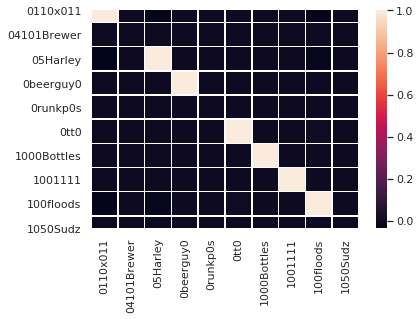

In [41]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_top_10_user, linewidths=.5, xticklabels=user, yticklabels=user)
plt.show()

## Prediction

In [42]:
#Doing the prediction for the users which are positively related with other users
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#Rating predicted by the user
user_prediction_rating = np.dot(user_correlation, beer_features.fillna(0))
user_prediction_rating

array([[1.08021496, 3.39593473, 1.77126419, ..., 1.25807707, 2.21947233,
        1.27570108],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.18702548, 4.41329831, 3.39699397, ..., 2.05788438, 2.95136025,
        1.37650858],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
user_prediction_rating.shape

(17123, 2069)

### we are interested only in the beer not rated by the user

In [45]:
final_rating = np.multiply(user_prediction_rating,train_dummy)
final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,1.080215,3.395935,1.771264,2.812227,0.292552,1.647332,3.650863,2.329887,8.444139,4.064073,5.721416,11.749219,2.280625,10.622642,1.303049,1.653680,2.845822,5.852758,5.520576,6.847518,4.511439,0.222314,1.492286,1.310563,9.027679,3.211039,0.781815,1.822143,1.078256,0.790974,0.256929,1.433283,4.116474,0.862837,5.149920,13.740742,2.440164,8.209156,13.438519,1.740424,...,1.823914,1.607772,1.829280,2.359369,0.705977,1.476559,1.678937,3.660520,3.368206,0.905597,1.878923,1.353215,1.419530,1.215966,1.073620,1.940142,1.723812,2.953778,1.803568,1.388179,3.118903,1.884525,3.803163,4.565277,1.189631,2.686304,1.701196,1.117937,3.161465,2.607509,6.675398,0.819729,0.557551,0.934867,1.340364,1.301108,0.799007,1.258077,2.219472,1.275701
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,2.187025,4.413298,3.396994,3.980091,1.129972,1.582688,3.845041,3.020586,11.961889,5.375659,9.746431,12.903667,2.570955,13.884235,1.742559,1.998712,2.772852,8.090406,7.962277,7.925833,3.835082,0.207663,1.397661,2.111202,11.236969,4.855528,1.716479,3.446594,2.148334,0.694331,0.841926,1.191062,2.267484,1.574443,6.107983,17.624381,3.007518,10.173620,16.652299,2.384114,...,1.348785,2.664347,1.874594,3.879748,1.858087,1.601419,2.512414,2.436801,2.713758,2.266426,2.018850,1.243038,0.657494,0.804508,1.232568,1.679819,2.210747,2.132509,3.684926,1.568470,2.558013,1.111037,3.230403,3.350813,0.962577,3.421968,0.732858,1.130543,2.146908,4.336188,5.468647,1.471974,0.969626,0.983442,1.009849,0.952888,1.033306,2.057884,2.951360,1.376509
0beerguy0,0.462734,1.247797,1.189105,3.226022,0.888656,0.392999,2.087861,0.711614,4.477474,4.193964,5.019384,3.092197,1.109516,1.495531,0.784476,1.288447,1.676675,2.532172,3.534343,5.219859,2.262112,0.031092,0.116397,0.167901,6.331125,1.283945,1.186295,1.462829,0.980905,0.432298,0.617441,1.933389,0.599689,0.141084,0.860575,5.857767,0.167366,5.732396,8.341027,0.571395,...,0.707465,0.326816,0.012875,0.589145,0.900665,0.489966,1.640246,0.338856,0.556344,0.765892,0.293996,0.232460,0.830884,0.269380,0.132329,0.004876,0.253756,0.287654,0.375911,1.149949,0.144594,0.102042,0.569652,0.611748,0.771469,0.719967,0.368804,0.027849,0.434741,0.329424,0.897121,0.778116,0.484757,0.320302,0.750008,0.214624,0.514131,0.321232,0.852736,0.462224
0runkp0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

### top 5 recommendation for the users

In [46]:
#For user 'cokes'
final_rating.ix['cokes'].sort_values(ascending=False)[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


beer_beerid
412     41.157535
1904    40.787254
4083    39.702745
1093    39.248579
1013    37.671341
Name: cokes, dtype: float64

In [47]:
#For user 'genog'
final_rating.ix['genog'].sort_values(ascending=False)[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


beer_beerid
2093     40.140864
1093     37.770100
11757    32.585039
4083     32.495871
276      32.328898
Name: genog, dtype: float64

In [48]:
#For user 'giblet'
final_rating.ix['giblet'].sort_values(ascending=False)[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


beer_beerid
2093    53.983131
1904    50.392770
1093    49.407005
412     48.704830
104     46.196213
Name: giblet, dtype: float64

### Item based Similarity

In [49]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,1099,1121987,11millsown113,11osixBrew,11thFloorBrewing,12ouncecurls,130guy,13smurrf,160Shillings,1759Girl,1759dallas,18alpha,1996StrokerKid,1Adam12,1Paradisebrew,1after909,1fastz28,1morebeer,1noa,1quiks10,1santore,1thinmint,1whiskey,20ozmonkey,21mmer,220emaple,22ozStone,2378GCGTG,23fyerfyter,...,zic,ziggy13,zimm421,zimmerbloke,zipperergj,zjungleist,zloew,zminor,znarf,znichols,zodiacv1,zodiak3000,zooalbert,zooga,zook74,zoolou,zoolzoo,zornbeast,zoso1967,zoso493,zplug123,zrab11,zseeanz,zsk,ztaylor1,ztoellner,ztprez,ztruempy,zuccard,zuffenhausen,zuggy9,zulufactor,zumicroom,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
mean = np.nanmean(beer_features, axis=1)
df1 = (beer_features.T-mean).T

In [51]:
#avg ration
mean

array([3.57051282, 3.68539326, 3.29166667, ..., 3.79487179, 4.21264368,
       3.68181818])

In [52]:
#averall rating
average_mean = np.mean(mean)
average_mean

3.8190555267606077

In [53]:
df1.head()

review_profilename,0110x011,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,1050Sudz,108Dragons,1099,1121987,11millsown113,11osixBrew,11thFloorBrewing,12ouncecurls,130guy,13smurrf,160Shillings,1759Girl,1759dallas,18alpha,1996StrokerKid,1Adam12,1Paradisebrew,1after909,1fastz28,1morebeer,1noa,1quiks10,1santore,1thinmint,1whiskey,20ozmonkey,21mmer,220emaple,22ozStone,2378GCGTG,23fyerfyter,...,zic,ziggy13,zimm421,zimmerbloke,zipperergj,zjungleist,zloew,zminor,znarf,znichols,zodiacv1,zodiak3000,zooalbert,zooga,zook74,zoolou,zoolzoo,zornbeast,zoso1967,zoso493,zplug123,zrab11,zseeanz,zsk,ztaylor1,ztoellner,ztprez,ztruempy,zuccard,zuffenhausen,zuggy9,zulufactor,zumicroom,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.314607,-0.185393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#finding Cosine SImilarity
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df1.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -1.29436812e-02  3.40620948e-02 ... -5.89741694e-03
   2.80863535e-02 -8.84760166e-04]
 [-1.29436812e-02  1.00000000e+00  4.28985018e-02 ...  2.36237241e-03
   2.46278150e-03  1.02924186e-02]
 [ 3.40620948e-02  4.28985018e-02  1.00000000e+00 ... -4.75705386e-04
  -9.47215849e-04  2.61905614e-02]
 ...
 [-5.89741694e-03  2.36237241e-03 -4.75705386e-04 ...  1.00000000e+00
   1.21741870e-02  1.77113879e-03]
 [ 2.80863535e-02  2.46278150e-03 -9.47215849e-04 ...  1.21741870e-02
   1.00000000e+00 -2.22678056e-02]
 [-8.84760166e-04  1.02924186e-02  2.61905614e-02 ...  1.77113879e-03
  -2.22678056e-02  1.00000000e+00]]


In [55]:
#filter which correlation is greater than 0
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.03406209, ..., 0.        , 0.02808635,
        0.        ],
       [0.        , 1.        , 0.0428985 , ..., 0.00236237, 0.00246278,
        0.01029242],
       [0.03406209, 0.0428985 , 1.        , ..., 0.        , 0.        ,
        0.02619056],
       ...,
       [0.        , 0.00236237, 0.        , ..., 1.        , 0.01217419,
        0.00177114],
       [0.02808635, 0.00246278, 0.        , ..., 0.01217419, 1.        ,
        0.        ],
       [0.        , 0.01029242, 0.02619056, ..., 0.00177114, 0.        ,
        1.        ]])

In [56]:
first_top_10_item = item_correlation[0:10, 0:10]
first_top_10_item

array([[1.        , 0.        , 0.03406209, 0.        , 0.        ,
        0.00331002, 0.01019813, 0.        , 0.        , 0.01458222],
       [0.        , 1.        , 0.0428985 , 0.        , 0.02255258,
        0.01348994, 0.        , 0.        , 0.        , 0.        ],
       [0.03406209, 0.0428985 , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.00117324, 0.02207168, 0.        , 0.01394446, 0.00408783],
       [0.        , 0.02255258, 0.        , 0.        , 1.        ,
        0.        , 0.01647006, 0.01672448, 0.02157432, 0.01316459],
       [0.00331002, 0.01348994, 0.        , 0.00117324, 0.        ,
        1.        , 0.        , 0.        , 0.01533679, 0.02396591],
       [0.01019813, 0.        , 0.        , 0.02207168, 0.01647006,
        0.        , 1.        , 0.01299044, 0.        , 0.05882708],
       [0.        , 0.        , 0.       

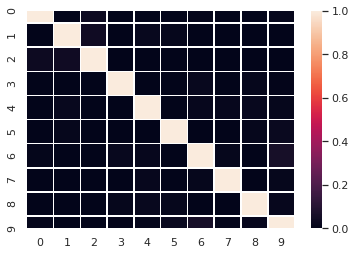

In [57]:
import seaborn as sns; sns.set()
ax = sns.heatmap(first_top_10_item, linewidths=.5)
plt.show()

### Prediction

In [58]:
item_prediction_rating = np.dot((beer_features.fillna(0).T),item_correlation)
item_prediction_rating

array([[0.06173536, 0.7466839 , 0.606243  , ..., 1.29974417, 0.58566475,
        0.99877053],
       [0.        , 0.12331185, 0.03360464, ..., 0.09019051, 0.        ,
        0.07190591],
       [0.07758834, 0.65311239, 0.55586527, ..., 0.22848513, 0.63660394,
        0.382217  ],
       ...,
       [0.25625761, 0.01604632, 0.29518236, ..., 0.        , 0.03660515,
        0.04262121],
       [0.        , 0.        , 0.01895655, ..., 0.00315516, 0.        ,
        0.03829853],
       [0.04330559, 0.        , 0.01115544, ..., 0.14011636, 0.00189435,
        0.27106245]])

In [59]:
item_prediction_rating.shape

(17123, 2069)

In [60]:
train_dummy.shape

(17123, 2069)

In [61]:
#Filtering the rating only for the beer not rated by the user for recommendation
item_final_rating = np.multiply(item_prediction_rating,train_dummy)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.061735,0.746684,0.606243,0.595153,1.003143,1.143927,1.084499,0.866534,1.010845,0.597353,0.869746,0.654207,0.781185,1.008078,0.447418,1.233307,1.903958,0.929209,0.970994,0.495600,0.639708,0.181781,0.501736,0.453744,0.835172,0.663090,0.306827,0.855009,1.242166,0.529862,0.460202,0.528245,0.541057,0.240867,0.647051,0.750838,0.545166,0.931785,0.845612,0.360763,...,0.869256,1.265397,0.526135,0.863421,0.189090,2.077637,0.939104,0.866900,1.275916,0.814958,0.752608,0.486193,0.205830,0.935230,0.434388,1.321950,0.588301,1.323274,0.574997,0.307810,0.728672,0.246108,0.936414,0.504245,0.989985,1.685622,0.623783,0.653457,0.345762,0.803899,0.991969,0.517110,0.270558,0.709692,0.416572,0.434098,1.718609,1.299744,0.585665,0.998771
04101Brewer,0.000000,0.123312,0.033605,0.032733,0.000000,0.000000,0.000000,0.000000,0.182671,0.033221,0.000000,0.079989,0.000000,0.037991,0.000000,0.000000,0.040232,0.026750,0.012790,0.028094,0.000000,0.000000,0.000000,0.000000,0.000000,0.124733,0.000000,0.000000,0.011111,0.480136,0.000000,0.000000,0.255813,0.042676,0.015676,0.017536,0.000000,0.000000,0.030394,0.004257,...,0.069250,0.000000,0.000000,0.000000,0.085486,0.000000,0.000000,0.068467,0.119653,0.000000,0.050653,0.366878,0.000000,0.000000,0.000000,0.027060,0.000000,0.000000,0.000000,0.000000,0.000000,0.137010,0.000000,0.000000,0.000000,0.008424,0.000000,0.000000,0.017011,0.043281,0.290695,0.000000,0.000000,0.000000,0.039821,0.000000,0.000000,0.090191,0.000000,0.071906
05Harley,0.077588,0.653112,0.555865,1.095622,0.518500,0.533226,0.439680,0.516176,0.369985,0.383250,0.324899,0.631814,0.152439,0.492500,0.459187,0.972205,0.306841,0.349435,0.564960,0.270053,0.255256,0.042687,0.445686,0.210646,0.353350,0.318744,0.250834,0.374395,0.268411,0.218104,0.309801,0.116662,0.671717,0.412954,0.759916,0.381489,0.185669,0.596578,0.370838,0.321269,...,0.458439,0.101488,0.559104,0.180062,0.476158,0.253878,0.183052,0.180495,0.380135,0.793865,0.270667,0.197066,0.336147,0.279025,0.319844,0.265426,0.334111,0.284242,0.304521,0.469294,0.593662,0.271375,1.700953,0.436274,0.164006,0.514972,0.112971,0.146718,0.104415,0.568058,0.614939,0.361376,0.056086,0.758267,0.499447,0.332967,0.678766,0.228485,0.636604,0.382217
0beerguy0,0.219216,0.231743,0.114733,0.220599,0.204601,0.201298,0.181203,0.064855,0.214199,0.216211,0.213043,0.040532,0.108640,0.252933,0.060489,0.016581,0.105783,0.103219,0.029470,0.117388,0.214157,0.000000,0.044884,0.069202,0.113814,0.134507,0.038765,0.151821,0.266426,0.315055,0.006524,0.075739,0.341879,0.058511,0.098445,0.068902,0.000000,0.087995,0.000000,0.061068,...,0.000000,0.000000,0.000000,0.044065,0.060205,0.161156,0.094930,0.000000,0.000754,0.052306,0.005601,0.190600,0.049202,0.025852,0.003896,0.046272,0.011904,0.012985,0.180894,0.202460,0.050013,0.021972,0.000000,0.048969,0.029668,0.063566,0.000525,0.000000,0.000000,0.003037,0.038555,0.051430,0.026463,0.053013,0.005030,0.000000,0.021084,0.006019,0.084708,0.016699
0runkp0s,0.015988,0.000000,0.010901,0.004594,0.020447,0.000000,0.000000,0.162097,0.071099,0.059803,0.000000,0.000000,0.094827,0.000000,0.035595,0.000000,0.002361,0.000000,0.052255,0.000000,0.086347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019792,0.008240,0.005127,0.039032,0.014838,0.068272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000882,...,0.069312,0.000000,0.031822,0.000000,0.033331,0.098389,0.127449,0.000000,0.054661,0.078716,0.000000,0.000000,0.000000,0.000000,0.000946,0.000000,0.000000,0.083570,0.065007,0.000000,0.160180,0.030089,0.027920,0.000000,0.

### Top 5 prediction

In [62]:
#For user 'cokes'
item_final_rating.ix['cokes'].sort_values(ascending=False)[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


beer_beerid
6075     12.567768
33467    11.132356
1876     10.952758
1167     10.798996
96       10.796340
Name: cokes, dtype: float64

In [63]:
#For user 'genog'
item_final_rating.ix['genog'].sort_values(ascending=False)[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


beer_beerid
60681    4.987882
33467    4.952700
6502     4.944550
39775    4.942353
7799     4.440454
Name: genog, dtype: float64

In [64]:
#For user 'giblet'
item_final_rating.ix['giblet'].sort_values(ascending=False)[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


beer_beerid
54413    3.992703
729      3.805479
6590     3.483469
1144     3.424835
1894     3.412494
Name: giblet, dtype: float64

### Evaluation

### Using User Similarity

In [0]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df = (test_beer_features.T-mean).T


In [66]:

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [67]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.14208987, 0.11619388, 0.09623561, ..., 0.        , 0.45668368,
        0.63649884],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.364834  , 0.14638482, 0.6310358 , ..., 0.        , 2.93548349,
        1.34836666],
       ...,
       [0.01721362, 1.35558931, 0.70853867, ..., 0.14602676, 0.04304768,
        0.3534341 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39970627, 1.96038885, 1.0914041 , ..., 0.        , 0.033445  ,
        0.97342066]])

### Prediction for the beer rated by the user

In [0]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,test_dummy)

In [69]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### RMSE for only the beer rated by user

In [70]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit_transform(X))
y = (scaler.transform(X))

print(y)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [0]:
test_df = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [0]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [73]:
rmse = (sum(sum((test_df - y )**2))/total_non_nan)**0.5
print(rmse)

2.0067976080394017


### Item Similarity

In [0]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [76]:
test_item_correlation.shape

(2069, 2069)

In [77]:
test_beer_features.shape

(2069, 12467)

In [80]:
test_item_prediction_rating = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_prediction_rating = np.multiply(test_item_prediction_rating,test_dummy) 
test_item_prediction_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,33,34,36,39,54,55,58,59,61,63,65,66,67,69,73,74,78,79,80,81,82,83,85,86,87,88,89,90,92,93,...,66036,66037,66281,66436,67040,67044,67106,67156,67219,67230,67262,67267,68008,68400,68746,68772,68916,68958,68960,69070,69363,69407,70102,70910,71369,71405,71758,71774,71919,71969,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test_df = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [83]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_prediction_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_df = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### RMSE

In [84]:
rmse = (sum(sum((test_df - y )**2))/total_non_nan)**0.5
print(rmse)

1.9159469528936377
